In [1]:
import sys
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
Air_traffic = pd.read_csv('C:/Users/Thales/Downloads/Air_Traffic_Passenger_Data.csv')
Air_traffic.head(10)

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July
5,200507,Air China,CA,Air China,CA,International,Asia,Deplaned,Other,International,G,6263,Deplaned,6263,2005,July
6,200507,Air China,CA,Air China,CA,International,Asia,Enplaned,Other,International,G,5500,Enplaned,5500,2005,July
7,200507,Air France,AF,Air France,AF,International,Europe,Deplaned,Other,International,A,12050,Deplaned,12050,2005,July
8,200507,Air France,AF,Air France,AF,International,Europe,Enplaned,Other,International,A,11638,Enplaned,11638,2005,July
9,200507,Air New Zealand,NZ,Air New Zealand,NZ,International,Australia / Oceania,Deplaned,Other,International,G,4998,Deplaned,4998,2005,July


In [3]:
Air_traffic.describe()

,Activity Period,Passenger Count,Adjusted Passenger Count,Year
count,15007.000000,15007.000000,15007.000000,15007.000000
mean,201045.073366,29240.521090,29331.917105,2010.385220
std,313.336196,58319.509284,58284.182219,3.137589
min,200507.000000,1.000000,1.000000,2005.000000
25%,200803.000000,5373.500000,5495.500000,2008.000000
50%,201011.000000,9210.000000,9354.000000,2010.000000
75%,201308.000000,21158.500000,21182.000000,2013.000000
max,201603.000000,659837.000000,659837.000000,2016.000000


In [4]:
Air_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15007 entries, 0 to 15006
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              15007 non-null  int64 
 1   Operating Airline            15007 non-null  object
 2   Operating Airline IATA Code  14953 non-null  object
 3   Published Airline            15007 non-null  object
 4   Published Airline IATA Code  14953 non-null  object
 5   GEO Summary                  15007 non-null  object
 6   GEO Region                   15007 non-null  object
 7   Activity Type Code           15007 non-null  object
 8   Price Category Code          15007 non-null  object
 9   Terminal                     15007 non-null  object
 10  Boarding Area                15007 non-null  object
 11  Passenger Count              15007 non-null  int64 
 12  Adjusted Activity Type Code  15007 non-null  object
 13  Adjusted Passenger Count     15

In [5]:
Air_traffic[0:5]

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July



<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of my_data) </li>
    <li> <b> y </b> as the <b> response vector </b> (target) </li>
</ul>

In [6]:
Air_traffic.drop(['Passenger Count'],axis=1,inplace=True)
Air_traffic.drop(['Year','Month'],axis=1,inplace=True)
Air_traffic.drop(['Operating Airline IATA Code','Published Airline IATA Code'],axis=1,inplace=True)
Air_traffic.drop(['Activity Type Code'],axis=1,inplace=True)

In [7]:
Air_traffic.head()

,Activity Period,Operating Airline,Published Airline,GEO Summary,GEO Region,Price Category Code,Terminal,Boarding Area,Adjusted Activity Type Code,Adjusted Passenger Count
0,200507,ATA Airlines,ATA Airlines,Domestic,US,Low Fare,Terminal 1,B,Deplaned,27271
1,200507,ATA Airlines,ATA Airlines,Domestic,US,Low Fare,Terminal 1,B,Enplaned,29131
2,200507,ATA Airlines,ATA Airlines,Domestic,US,Low Fare,Terminal 1,B,Thru / Transit * 2,10830
3,200507,Air Canada,Air Canada,International,Canada,Other,Terminal 1,B,Deplaned,35156
4,200507,Air Canada,Air Canada,International,Canada,Other,Terminal 1,B,Enplaned,34090


In [8]:
#storing independent variables in x and dependent variables in y
#df.iloc[START:STOP:STEP, START:STOP:STEP]-> df.iloc[select row by indexing position, select column by indexing position]
x = Air_traffic.iloc[:,:-1] # all row and column excluded last column
y = Air_traffic.iloc[:,-1].values #Slected last column Adjusted Passenger Count only

In [9]:
Air_traffic.iloc[:,:-1]

,Activity Period,Operating Airline,Published Airline,GEO Summary,GEO Region,Price Category Code,Terminal,Boarding Area,Adjusted Activity Type Code
0,200507,ATA Airlines,ATA Airlines,Domestic,US,Low Fare,Terminal 1,B,Deplaned
1,200507,ATA Airlines,ATA Airlines,Domestic,US,Low Fare,Terminal 1,B,Enplaned
2,200507,ATA Airlines,ATA Airlines,Domestic,US,Low Fare,Terminal 1,B,Thru / Transit * 2
3,200507,Air Canada,Air Canada,International,Canada,Other,Terminal 1,B,Deplaned
4,200507,Air Canada,Air Canada,International,Canada,Other,Terminal 1,B,Enplaned
...,...,...,...,...,...,...,...,...,...
15002,201603,Virgin America,Virgin America,Domestic,US,Low Fare,Terminal 2,D,Enplaned
15003,201603,Virgin America,Virgin America,International,Mexico,Low Fare,International,A,Deplaned
15004,201603,Virgin America,Virgin America,International,Mexico,Low Fare,Terminal 2,D,Enplaned
15005,201603,Virgin Atlantic,Virgin Atlantic,International,Europe,Other,International,A,Deplaned


In [10]:
#split data set into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [11]:
#convert categorical column into numerical using label encoding
label_encode_geo_summary = LabelEncoder()
label_encode_price = LabelEncoder()

In [12]:
x_train['GEO Summary']= label_encode_geo_summary.fit_transform(x_train.iloc[:,3])
x_train['Price Category Code'] = label_encode_price.fit_transform(x_train.iloc[:,5])
x_test['GEO Summary']=label_encode_geo_summary.fit_transform(x_test.iloc[:,3])
x_test['Price Category Code']=label_encode_price.fit_transform(x_test.iloc[:,5])

In [13]:
x_train

,Activity Period,Operating Airline,Published Airline,GEO Summary,GEO Region,Price Category Code,Terminal,Boarding Area,Adjusted Activity Type Code
13750,201505,United Airlines,United Airlines,0,US,1,Terminal 3,E,Deplaned
14344,201510,SkyWest Airlines,United Airlines,0,US,1,Terminal 3,F,Deplaned
8504,201108,Air Canada,Air Canada,1,Canada,1,International,G,Deplaned
2643,200706,Air China,Air China,1,Asia,1,International,G,Enplaned
8568,201108,SkyWest Airlines,United Airlines - Pre 07/01/2013,0,US,1,Terminal 3,F,Deplaned
...,...,...,...,...,...,...,...,...,...
905,200602,United Airlines - Pre 07/01/2013,United Airlines - Pre 07/01/2013,1,Asia,1,International,G,Thru / Transit * 2
5192,200903,Lufthansa German Airlines,Lufthansa German Airlines,1,Europe,1,International,G,Enplaned
12172,201404,Alaska Airlines,Alaska Airlines,0,US,1,Terminal 1,B,Enplaned
235,200509,ATA Airlines,ATA Airlines,0,US,0,Terminal 1,B,Thru / Transit * 2


In [14]:
#One Hot Encoding
columns=['Operating Airline', 'Published Airline', 'GEO Region', 'Terminal','Boarding Area', 'Adjusted Activity Type Code']
from sklearn.preprocessing import OneHotEncoder
one_hot_enc = OneHotEncoder(sparse=False)
one_hot_enc.fit(x_train[columns])


OneHotEncoder(sparse=False)

In [15]:
a=one_hot_enc.transform(x_train[columns])
a

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [16]:
x_train=x_train.values

In [17]:
b=one_hot_enc.transform(x_test[columns])
b

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [18]:
x_test=x_test.values

In [19]:
x_train=np.concatenate((x_train,a),1)

In [20]:
x_train=pd.DataFrame(x_train)

In [21]:
x_train.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
174    0
175    0
176    0
177    0
178    0
Length: 179, dtype: int64

In [22]:
x_train=x_train.drop(columns=[1,2,4,6,7,8],axis=1)
x_train=x_train.values

In [23]:
x_test=np.concatenate((x_test,b),1)

In [24]:
x_test=pd.DataFrame(x_test)
x_test

,0,1,2,3,4,5,6,7,8,9,...,169,170,171,172,173,174,175,176,177,178
0,201311,Air France,Air France,1,Europe,1,International,A,Deplaned,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,201312,Air New Zealand,Air New Zealand,1,Australia / Oceania,1,International,G,Deplaned,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,201206,United Airlines - Pre 07/01/2013,United Airlines - Pre 07/01/2013,1,Europe,1,International,G,Thru / Transit * 2,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,200903,Alaska Airlines,Alaska Airlines,1,Mexico,1,Terminal 1,B,Enplaned,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,201203,United Airlines - Pre 07/01/2013,United Airlines - Pre 07/01/2013,0,US,1,Terminal 3,F,Deplaned,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2997,200803,American Eagle Airlines,American Airlines,0,US,1,Terminal 3,E,Deplaned,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2998,201103,Cathay Pacific,Cathay Pacific,1,Asia,1,International,A,Deplaned,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2999,201101,United Airlines - Pre 07/01/2013,United Airlines - Pre 07/01/2013,0,US,1,Terminal 3,E,Thru / Transit * 2,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3000,200802,Hawaiian Airlines,Hawaiian Airlines,0,US,1,Terminal 1,C,Enplaned,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [25]:
x_test=x_test.drop(columns=[1,2,4,6,7,8],axis=1)
x_test=x_test.values

Decision Tree

In [26]:
# Decision Tree Regression Technique
from sklearn import tree
reg=tree.DecisionTreeRegressor()
reg=reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)

In [27]:
DTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [28]:
DTree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [29]:
predTree = DTree.predict(x_test)

In [30]:
print (predTree [0:5])
print (y_test [0:5])

[5007  940  940 5646   57]
[  7170   9678    660   6752 388088]


In [31]:
#Accuracy Score
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.0


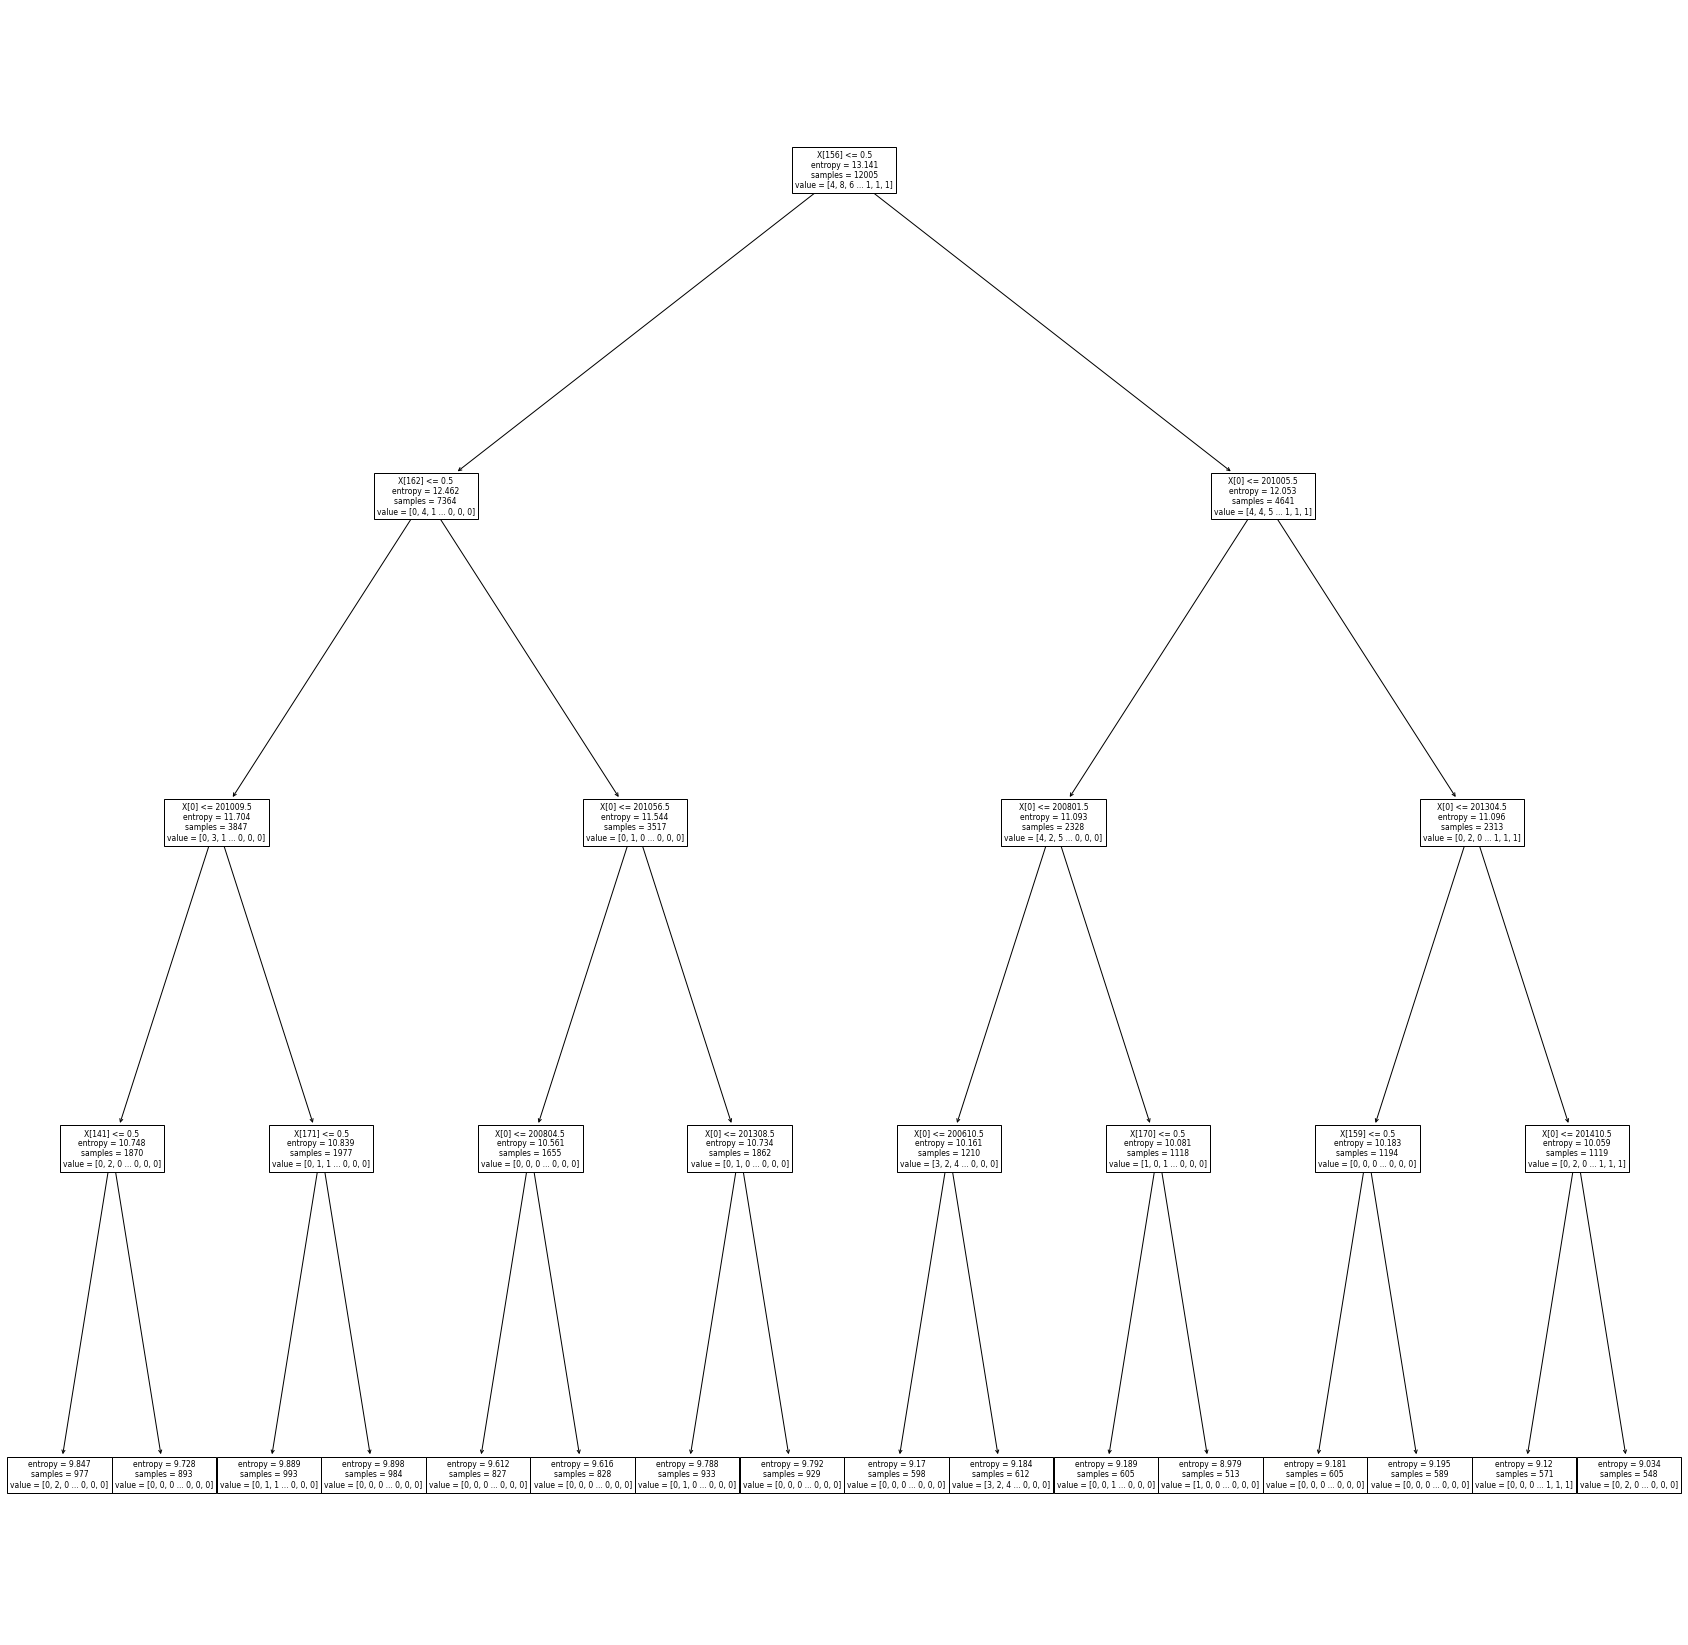

In [32]:
plt.figure(figsize=(30,30))
tree.plot_tree(DTree, filled=True)
plt.show()

In [33]:
# MSE
from sklearn.metrics import  mean_squared_error
MSE=mean_squared_error(y_pred,y_test)
MSE

54026597.59427048

In [34]:
#R2 score
from sklearn.metrics import r2_score
RScore=r2_score(y_test, y_pred)
RScore

0.9867160291978122

Random Forest

In [80]:
# RandomForest Regression Technique
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=10,random_state=0)
regressor.fit(x_train,y_train)
y_pred1=regressor.predict(x_test)

In [81]:
RScore=r2_score(y_pred1,y_test)
RScore

0.9870759946430739

In [82]:
MSE = mean_squared_error(y_pred1,y_test)
MSE

52424940.00279481

Decision Tree with another bank dataset


In [35]:
Bank_data = pd.read_csv('C:/Users/Thales/Downloads/bank.csv')

In [36]:
Bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [37]:
Bank_data.drop(['default','contact','campaign', 'pdays', 'previous', 'poutcome' ],axis=1,inplace=True)

In [38]:
# re-arrange order of columns
Bank_data = Bank_data[['age', 'job', 'marital', 'education', 'balance', 'housing','loan','day','month','deposit','duration']]

In [39]:
# storing independent variables in x and dependent variables in y
x = Bank_data.iloc[:,:-1]
y = Bank_data.iloc[:,-1].values

In [40]:
# split data-set into train/test
x_bank_train, x_bank_test, y_bank_train, y_bank_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [41]:
#convert categorical column into numerical using label encoding
label_encode_job = LabelEncoder()
label_encode_marital = LabelEncoder()
label_encode_education = LabelEncoder()
label_encode_housing = LabelEncoder()
label_encode_loan = LabelEncoder()
label_encode_deposit = LabelEncoder()

In [42]:
Bank_data.head(2)

,age,job,marital,education,balance,housing,loan,day,month,deposit,duration
0,59,admin.,married,secondary,2343,yes,no,5,may,yes,1042
1,56,admin.,married,secondary,45,no,no,5,may,yes,1467


In [43]:
# x train
x_bank_train['marital'] = label_encode_marital.fit_transform(x_bank_train.iloc[:,2])
x_bank_train['education'] = label_encode_education.fit_transform(x_bank_train.iloc[:,3])
x_bank_train['housing'] = label_encode_housing.fit_transform(x_bank_train.iloc[:,5])
x_bank_train['loan'] = label_encode_loan.fit_transform(x_bank_train.iloc[:,6])
x_bank_train['deposit'] = label_encode_deposit.fit_transform(x_bank_train.iloc[:,9])
# x test
x_bank_test['marital'] = label_encode_marital.fit_transform(x_bank_test.iloc[:,2])
x_bank_test['education'] = label_encode_education.fit_transform(x_bank_test.iloc[:,3])
x_bank_test['housing'] = label_encode_housing.fit_transform(x_bank_test.iloc[:,5])
x_bank_test['loan'] = label_encode_loan.fit_transform(x_bank_test.iloc[:,6])
x_bank_test['deposit'] = label_encode_deposit.fit_transform(x_bank_test.iloc[:,9])

In [44]:
# One Hot Encoding
columns =['job','month']
one_hot_encoder_bank = OneHotEncoder(sparse=False)
one_hot_encoder_bank.fit(x_bank_train[columns])

OneHotEncoder(sparse=False)

In [45]:
A = one_hot_encoder_bank.transform(x_bank_train[columns])
B = one_hot_encoder_bank.transform(x_bank_test[columns])

In [46]:
x_bank_train = x_bank_train.values

In [47]:
x_bank_train = np.concatenate((x_bank_train, A),1)

In [48]:
x_bank_train = pd.DataFrame(x_bank_train)

In [49]:
x_bank_test = np.concatenate((x_bank_test,B),1)

In [50]:
x_bank_test = pd.DataFrame(x_bank_test)
x_bank_test

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,31,admin.,2,1,554,1,0,5,feb,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,43,blue-collar,1,1,514,1,1,20,apr,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,26,blue-collar,2,1,277,0,0,14,may,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,39,services,2,1,91,0,0,3,sep,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,40,management,1,2,0,0,0,6,aug,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,36,admin.,1,1,465,1,0,20,may,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2229,28,student,2,1,1377,1,0,14,may,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2230,52,entrepreneur,1,1,1306,0,0,15,jun,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2231,30,management,2,2,102,1,0,18,dec,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
x_bank_train=x_bank_train.drop(columns=[1,8],axis=1)

In [52]:
x_bank_test = x_bank_test.drop(columns=[1,8],axis=1)

In [59]:
x_bank_test = x_bank_test.values

In [60]:
D_Regression = tree.DecisionTreeRegressor()
D_Regression = D_Regression.fit(x_bank_train,y_bank_train)

In [61]:
y_bank_pred = D_Regression.predict(x_bank_test)

In [64]:
D_BankTree = DecisionTreeClassifier(criterion="entropy", max_depth=4)

In [65]:
D_BankTree.fit(x_bank_train, y_bank_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [66]:
pred_bank_tree = D_BankTree.predict(x_bank_test)

In [67]:
print (pred_bank_tree [0:5])
print (y_bank_test [0:5])

[138 138  76 314 314]
[ 94  34 514 213 131]


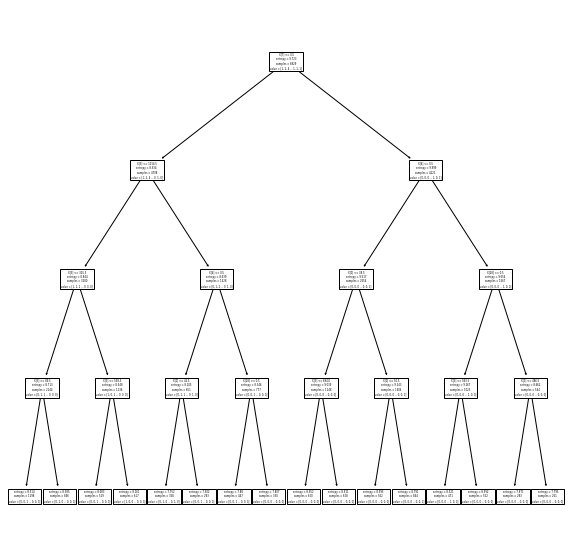

In [71]:
plt.figure(figsize=(10,10))
tree.plot_tree(D_BankTree, filled=True)
plt.show()

In [73]:
#Accuracy Score
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_bank_test, pred_bank_tree))

DecisionTrees's Accuracy:  0.0022391401701746527


In [72]:
from sklearn.metrics import mean_squared_error
Bank_MSE = mean_squared_error(y_bank_pred,y_bank_test)
Bank_MSE

164289.25570980745

In [74]:
from sklearn.metrics import r2_score
RScore=r2_score(y_bank_test, y_bank_pred)
RScore

-0.2840322090462073

Random Forest Bank

In [76]:
# RandomForest Regression Technique
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=10,random_state=0)
regressor.fit(x_bank_train,y_bank_train)
y_bank_pred1=regressor.predict(x_bank_test)
y_bank_pred1

array([195.7, 248.9, 286. , ..., 734.5, 562.3, 261.6])

In [78]:
RScore=r2_score(y_bank_pred1,y_bank_test)
RScore

-0.6349409225861209

In [79]:
MSE = mean_squared_error(y_bank_pred1,y_bank_test)
MSE

94758.96716151292

Random Forest

In [56]:
# RandomForest Regression Technique
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=10,random_state=0)
regressor.fit(x_train,y_train)
y_pred1=regressor.predict(x_test)

In [57]:
RScore=r2_score(y_pred1,y_test)
RScore

0.9870759946430739

In [58]:
MSE = mean_squared_error(y_pred1,y_test)
MSE

52424940.00279481

K Nearest Neighbour